## Jupyter Notebook for Post-training Model analysis

In [32]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

In [33]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [34]:
plt.style.use('seaborn-v0_8-deep')
sns.set_theme(style="darkgrid", palette="deep")
plt.rcParams.update({
    'axes.facecolor': "#1D1C1C",
    'figure.facecolor': "#0E0E0E",
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#555555',
    'savefig.facecolor': "#0C0C0C",
    'savefig.edgecolor': '#000000'
})

### Load Model And Data

In [35]:
model = joblib.load("rf_model.joblib")
pred_df = pd.read_csv("STEMx-2025-AI-Astro-Material/predictions.csv") 

y_test = pred_df['Predictions']
X_test = pred_df.drop(columns=['Predictions'])

pred_df.shape
pred_df.head()

,P_MASS,P_RADIUS,P_TEMP_EQUIL,P_PERIOD,P_SEMI_MAJOR_AXIS,S_TEMPERATURE,S_MASS,S_RADIUS,P_FLUX,P_GRAVITY,Predictions
0,8.750,1.950,1616.0,3.595100,0.04700,5430.0,1.05,1.71,1037.0,22.596915,0.258491
1,14.670,3.670,990.0,15.624000,0.13000,5430.0,1.05,1.71,160.0,10.695677,0.193616
2,10.180,3.940,752.0,35.747000,0.22000,5430.0,1.05,1.71,53.0,6.439700,0.200249
3,8.410,2.733,567.0,1.580405,0.01505,3101.0,0.18,0.22,17.2,11.056739,0.282063
4,0.633,0.699,1365.0,0.321923,0.00709,3522.0,0.46,0.46,579.0,12.722125,0.286261


### Feature Importances

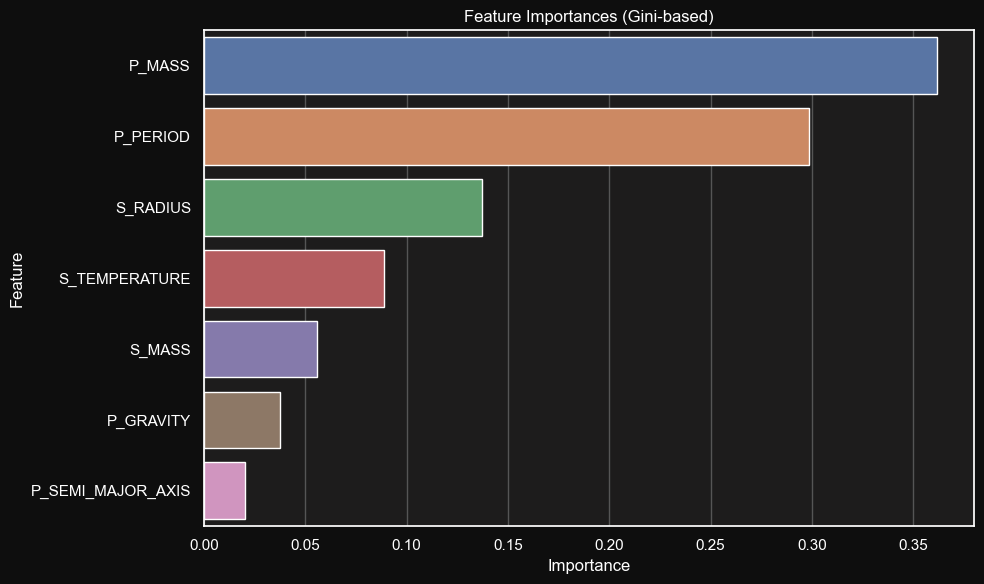

In [ ]:
columns_to_ignore = []  # features NOT used in training

# Filter out ignored columns from X_test to get only the features used in training
feature_names = [col for col in X_test.columns if col not in columns_to_ignore]

# Now it's safe to use this filtered list with model.feature_importances_
importances = model.feature_importances_

# Build DataFrame for plotting
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x="Importance", y="Feature", hue="Feature", legend=False)
plt.title("Feature Importances (Gini-based)")
plt.tight_layout()
plt.show()

### Permutation Importance

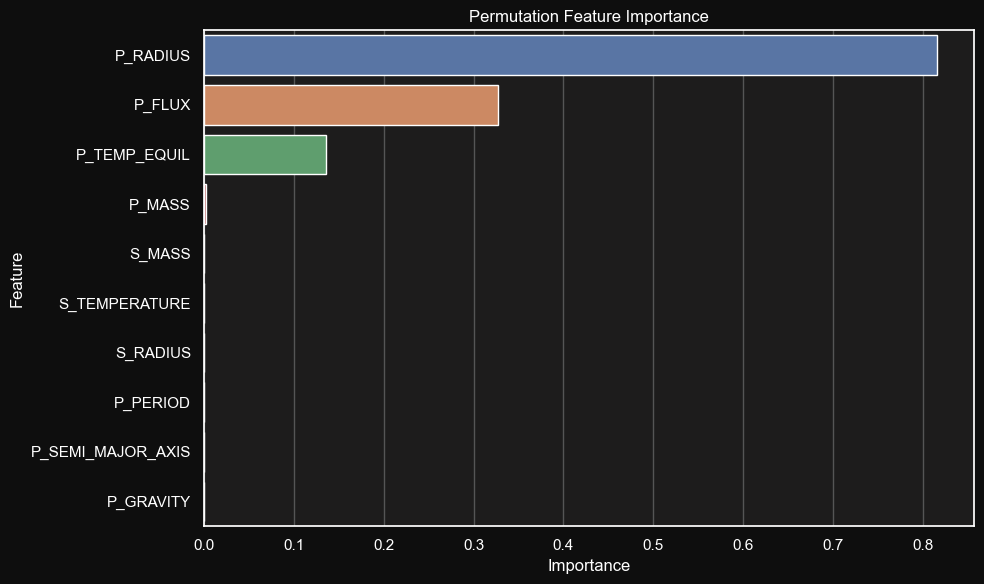

In [ ]:
perm = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_df = pd.DataFrame({"Feature": feature_names, "Importance": perm.importances_mean})
perm_df = perm_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=perm_df, x="Importance", y="Feature", hue="Feature", legend=False)
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()

### Partial Dependence Plots

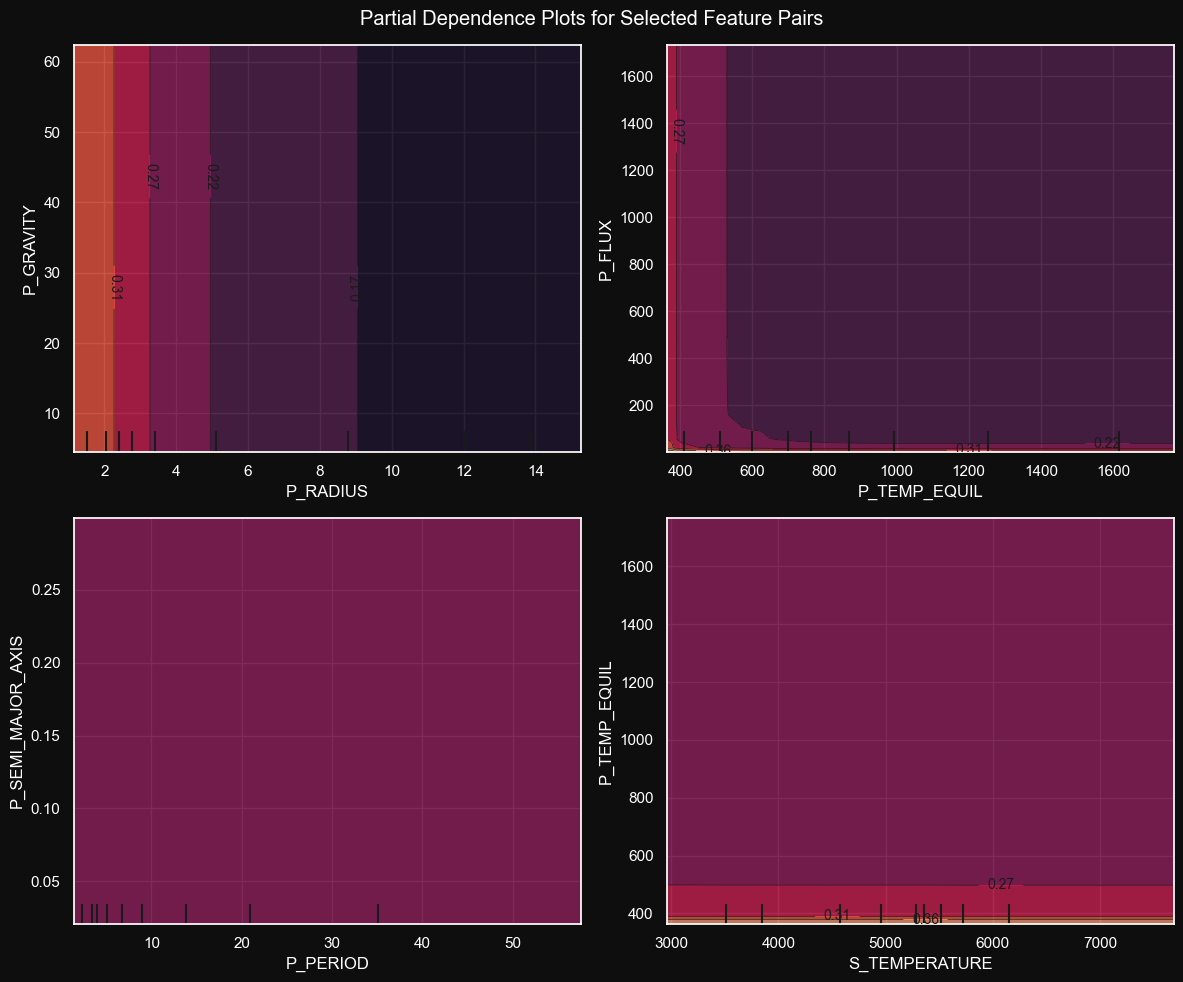

In [ ]:
selected_pairs = [
    ["P_RADIUS", "P_GRAVITY"],
    ["P_TEMP_EQUIL", "P_FLUX"],
    ["P_PERIOD", "P_SEMI_MAJOR_AXIS"],
    ["S_TEMPERATURE", "P_TEMP_EQUIL"]
]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
PartialDependenceDisplay.from_estimator(model, X_test, features=selected_pairs, kind="average", ax=ax)
plt.suptitle("Partial Dependence Plots for Selected Feature Pairs")
plt.tight_layout()
plt.show()